In [123]:
import pandas as pd
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
from scipy.optimize import curve_fit

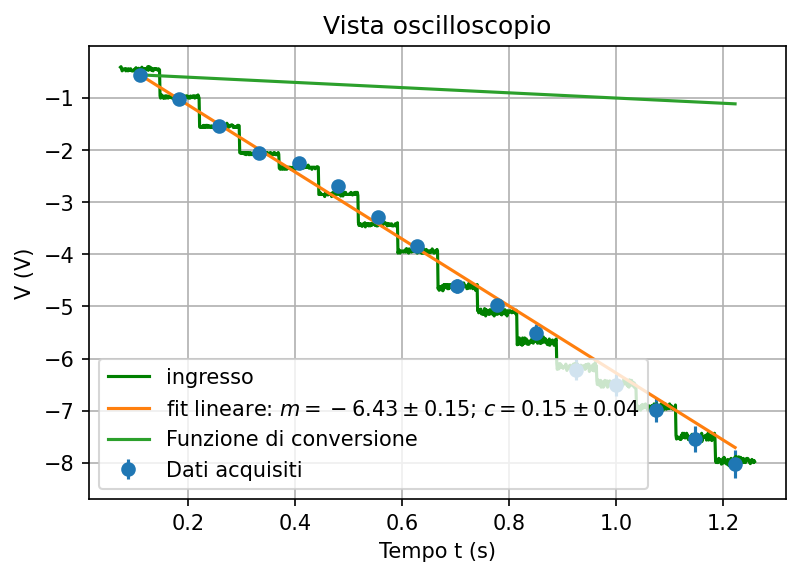

In [138]:
j=2

df = pd.read_csv("scope_{}.csv".format(j))

x =[]
v1 = []
stepponix = []
steppinix = []
stepponiy = []
steppiniy = []
buff = []
buffx = []
steppies = []
mediex = []
k = 0

for i in df["x-axis"][1:]:
    k+=1
    h = float(df["2"][k])
    if float(i) > (0.07199999999999995-1) and float(i) < 0.26:
        x.append(float(i)+1)
        v1.append(h)
        
        if(k < len(df["2"])-1):
            #mostro i punti che hanno differenza di v maggiore di 0.5 (i piccoli steppini)
            if (float(df["2"][k+1]) - h) > -0.271:
                #print("Steppino al tempo "+str(float(i)+1))
                steppinix.append(float(i)+1)
                buff.append(h)
                buffx.append(float(i)+1)
                steppiniy.append(h)
            else:
                #print(mean(buff))
                steppies.append(mean(buff))
                mediex.append(mean(buffx))
                buff = []
                buffx = []

steppies.append(mean(buff))
mediex.append(mean(buffx))
    
x = np.array(x)
v1 = np.array(v1)
mediex = np.array(mediex)

plt.plot(x, v1, color="green", label="ingresso")
#plt.plot(mediex,steppies, label="ideal")

#disegno una linea tratteggiata orizzontale per ogni livello di step
#for i in steppiniy:
    #plt.axhline(y=i, ls="--")
#for i in steppies:
#    plt.axhline(y=i, ls="--")

gradini = np.array([525,575,525,262.5,512.5,575,500,687.5,487.5,562.5,475,312.5,462.5,562.5,475])*1e-3
V_X = np.array([-0.56, -1.02, -1.53, -2.05, -2.24, -2.69, -3.28, -3.84, -4.6, -4.98, -5.5, -6.21, -6.5,  -6.98, -7.54, -8.03])
sigmaV = lambda a: 0.04*a+.05
sigmaVV = lambda a: 0.03*a
sigma_V_X = sigmaV(V_X)

def retta(x,m,c):
    return m*x+c
def conv(x, step):
    return (x*step+step)*(-1)

popt, cov = curve_fit(retta, mediex, V_X, sigma=sigma_V_X)
plt.errorbar(mediex, V_X, yerr=sigma_V_X, linestyle="", marker="o", label="Dati acquisiti")
plt.plot(mediex, retta(mediex, popt[0], popt[1]), label="fit lineare: $m={}\pm{}$; $c={}\pm{}$".format(popt[0].round(2), (cov[0][0]**.5).round(2), popt[1].round(2), (cov[1][1]**.5).round(2)))
plt.plot(mediex, conv(mediex, gradini.mean()), label="Funzione di conversione")
#plt.xticks(range(16))
#plt.grid()
#plt.xlabel("Valore contato")
#plt.ylabel("$V_X$")

#plt.scatter(steppinix, steppiniy, color="red")
#plt.plot(x, v2, color="yellow", label="ingresso 2")
plt.xlabel("Tempo t (s)")
plt.ylabel("V (V)")
plt.grid()
plt.legend()
plt.title("Vista oscilloscopio")
plt.savefig("scope_{}.png".format(j), dpi=150)